In [1]:
import numpy as np
import matplotlib.pyplot as plt


import pyRTC.utils as utils
from pyRTC import *
from astropy.io import fits

from cacofoni.make_cacofoni import make_cacofoni

Spinnaker python SDK installation not found
ximea python SDK installation not found
PI python SDK installation not found
Andor python SDK installation not found


In [8]:
conf = utils.read_yaml_file("config_felixsim.yaml")
telemetry = ImakaTelemetry(conf=conf["telemetry"])

## Save aocbs

In [9]:
telemetry.dataDir = "data/20250930/"

In [3]:
telemetry.save(idx=0, saveWFSImages=False)

Opening Existing Shared Memory Object wfs_meta
Closing wfs_meta
Opening Existing Shared Memory Object wfs
Opening Existing Shared Memory Object wfs_meta
Opening Existing Shared Memory Object wfsRaw_meta
Closing wfsRaw_meta
Opening Existing Shared Memory Object wfsRaw
Opening Existing Shared Memory Object wfsRaw_meta
Opening Existing Shared Memory Object signal_meta
Closing signal_meta
Opening Existing Shared Memory Object signal
Opening Existing Shared Memory Object signal_meta
Opening Existing Shared Memory Object wfc2D_meta
Closing wfc2D_meta
Opening Existing Shared Memory Object wfc2D
Opening Existing Shared Memory Object wfc2D_meta
Opening Existing Shared Memory Object loop_meta
Closing loop_meta
Opening Existing Shared Memory Object loop
Opening Existing Shared Memory Object loop_meta
Opening Existing Shared Memory Object refSlopes_meta
Closing refSlopes_meta
Opening Existing Shared Memory Object refSlopes
Opening Existing Shared Memory Object refSlopes_meta
Closing wfs
Closing wf

'/Users/ellenlee/Documents/pyRTC-IRTF/IRTF/data/aocb0000.fits'

In [10]:
telemetry.setNumIter(27000)  # number of loop iterations per telemetry file

## CACOFONI imat
Verify the following:
- leakyIntegrator is being used and loop is running
- pbGain > 0; you should be able to see the modulation
- loop.setNumDroppedModes(0)


In [22]:
# Record telemetry for CACOFONI once you're set up properly
num_aocbs = 3
idx_start = 0  # starting index of aocb file

fns_aocb = []
for i in range(num_aocbs):
    fnout = telemetry.save(idx_start)
    idx_start += 1
    fns_aocb.append(fnout)

Opening Existing Shared Memory Object wfs_meta
Closing wfs_meta
Opening Existing Shared Memory Object wfs
Opening Existing Shared Memory Object wfs_meta
Opening Existing Shared Memory Object wfsRaw_meta
Closing wfsRaw_meta
Opening Existing Shared Memory Object wfsRaw
Opening Existing Shared Memory Object wfsRaw_meta
Opening Existing Shared Memory Object signal_meta
Closing signal_meta
Opening Existing Shared Memory Object signal
Opening Existing Shared Memory Object signal_meta
Opening Existing Shared Memory Object wfc2D_meta
Closing wfc2D_meta
Opening Existing Shared Memory Object wfc2D
Opening Existing Shared Memory Object wfc2D_meta
Opening Existing Shared Memory Object wfcShape_meta
Closing wfcShape_meta
Opening Existing Shared Memory Object wfcShape
Opening Existing Shared Memory Object wfcShape_meta
Opening Existing Shared Memory Object loop_meta
Closing loop_meta
Opening Existing Shared Memory Object loop
Opening Existing Shared Memory Object loop_meta
Opening Existing Shared Me

In [2]:
fns_aocb = ['/Users/ellenlee/Documents/pyRTC-IRTF/IRTF/data/20250930/aocb0003.fits']

In [8]:
fns_aocb = ['/Users/ellenlee/Documents/pyRTC-IRTF/IRTF/data/aocb0003.fits']

Setting up make_cacofoni...

[Config] Assuming 7 actuators from config for loading telemetry data.
[Config] Assuming 2 'x' subapertures from config for loading telemetry data.
[Config] Assuming 2 'y' subapertures from config for loading telemetry data.

[Config] Assuming 4.0 Hz for minimum frequency.
[Config] Assuming 10.0 Hz for maximum frequency.

Using user-provided file: /Users/ellenlee/Documents/pyRTC-IRTF/IRTF/data/20250930/aocb0000.fits

Loading imaka telemetry file...

Loading Extension 0: Loop state
------------------------------------------------
Shape of Extension             = (27000, 5)
Loading                        = 'clocktime' in 'loop'
Key Shape                      = 'clocktime': (27000,)
------------------------------------------------

Loading Extension 3: Centroids
------------------------------------------------
Shape of Extension             = (27000, 1, 8)
Loading                        = 'xcentroids' in 'wfs'
Key Shape                      = (27000, 1, 4)
Load

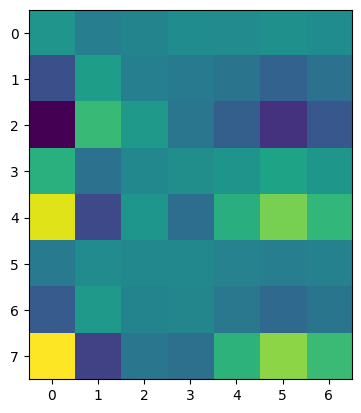

In [28]:
imats = []
#z2a_file = "calib/z2a.empirical_norm.20250408b.7modes.fits"
z2a_file = "calib/z2a.20240409b.7modes.fits"
for fn in fns_aocb:
    freq, psdmes, psdmod, filter_mask, imat, laplacian = make_cacofoni(
        telemetry_filepath=fn,
        modal_filepath=z2a_file,
        modal=True,
        closed=None,
        choose_n_steps=None,
        start_index=None,
        silent=False,
        debug=True,
        config=None,
        keep_as_modal=True
    )
    imats.append(imat)
imat = np.average(imats, axis=0)

plt.figure()
plt.imshow(imat)
plt.show()

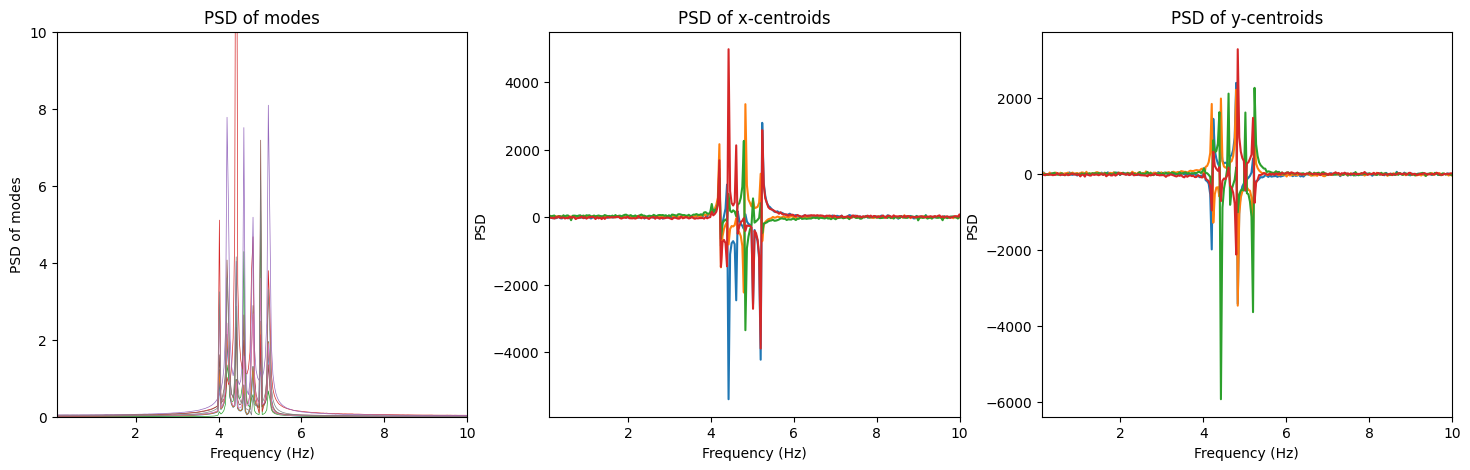

In [27]:
nmodes = 7

fig, ax = plt.subplots(figsize=(18, 5), ncols=3, nrows=1)

ax[0].set_title('PSD of modes')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('PSD of modes')
ax[0].plot(freq, psdmod[:, 0], linewidth=1)

for i in range(nmodes):
    color_val = float(i) * 200. / 36. + 50.
    ax[0].plot(freq, psdmod[:, i], linewidth=0.5)

ax[0].set_xlim(0.1, 10)
ax[0].set_ylim(0, 10)


ax[1].set_title('PSD of x-centroids')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('PSD')
# ax[1].plot(freq, psdmes[16, :], linewidth=1)

for i in range(4):
    color_val = i / 4
    ax[1].plot(freq, psdmes[:, i+4])
    
ax[1].set_xlim(0.1, 10)
# ax[1].set_ylim(-0.4, 0.4)

ax[2].set_title('PSD of y-centroids')
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('PSD')

for i in range(4):
    color_val = i / 4
    ax[2].plot(freq, psdmes[:, i])
    
ax[2].set_xlim(0.1, 10)
# ax[2].set_ylim(-0.4, 0.4)

plt.show()

In [29]:
# The cmat will be generated by pyRTC.
# Run loop.saveIM() to save the cmat.
np.save("calib/imat/imat.cacofoni.20250930.a.npy", imat)

z2a = fits.getdata(z2a_file)
imat_zonal = imat @ z2a.T # this is what you would put into the imaka RTC
np.save("calib/imat/imat.cacofoni.zonal.20250930.a.npy", imat_zonal)

In [31]:
fits.writeto("calib/imat/imat.cacofoni.20250930.a.fits", imat, overwrite=True)
fits.writeto("calib/imat/imat.cacofoni.zonal.20250930.a.fits", imat_zonal, overwrite=True)

In [30]:
fns_aocb

['/Users/ellenlee/Documents/pyRTC-IRTF/IRTF/data/20250930/aocb0000.fits',
 '/Users/ellenlee/Documents/pyRTC-IRTF/IRTF/data/20250930/aocb0001.fits',
 '/Users/ellenlee/Documents/pyRTC-IRTF/IRTF/data/20250930/aocb0002.fits']

In [36]:
imat_zonal.shape

(8, 36)